In [1]:

import pandas as pd
import networkx as nx

# Load the dataset
data = pd.read_csv("/content/Student Mental health.csv")
data.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [2]:

# Convert "Yes" to 1 and "No" to 0
data = data.replace({"Yes": 1, "No": 0})

# Filter data and convert to numeric
#filtered_data = data.set_index('Email Address').select_dtypes(include=[float, int])

data

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,0,1,0,1,0
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,0,0,1,0,0
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,0,1,1,1,0
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,1,1,0,0,0
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,Female,21.0,BCS,year 1,3.50 - 4.00,0,0,1,0,0
97,13/07/2020 21:21:42,Male,18.0,Engineering,Year 2,3.00 - 3.49,0,1,1,0,0
98,13/07/2020 21:22:56,Female,19.0,Nursing,Year 3,3.50 - 4.00,1,1,0,1,0
99,13/07/2020 21:23:57,Female,23.0,Pendidikan Islam,year 4,3.50 - 4.00,0,0,0,0,0


In [7]:
data = data.drop(columns = ['Timestamp'])

In [3]:
data

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,0,1,0,1,0
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,0,0,1,0,0
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,0,1,1,1,0
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,1,1,0,0,0
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,Female,21.0,BCS,year 1,3.50 - 4.00,0,0,1,0,0
97,13/07/2020 21:21:42,Male,18.0,Engineering,Year 2,3.00 - 3.49,0,1,1,0,0
98,13/07/2020 21:22:56,Female,19.0,Nursing,Year 3,3.50 - 4.00,1,1,0,1,0
99,13/07/2020 21:23:57,Female,23.0,Pendidikan Islam,year 4,3.50 - 4.00,0,0,0,0,0


In [4]:
data = data.replace({"Female": 1, "Male": 0})

In [5]:
data

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,1,18.0,Engineering,year 1,3.00 - 3.49,0,1,0,1,0
1,8/7/2020 12:04,0,21.0,Islamic education,year 2,3.00 - 3.49,0,0,1,0,0
2,8/7/2020 12:05,0,19.0,BIT,Year 1,3.00 - 3.49,0,1,1,1,0
3,8/7/2020 12:06,1,22.0,Laws,year 3,3.00 - 3.49,1,1,0,0,0
4,8/7/2020 12:13,0,23.0,Mathemathics,year 4,3.00 - 3.49,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,1,21.0,BCS,year 1,3.50 - 4.00,0,0,1,0,0
97,13/07/2020 21:21:42,0,18.0,Engineering,Year 2,3.00 - 3.49,0,1,1,0,0
98,13/07/2020 21:22:56,1,19.0,Nursing,Year 3,3.50 - 4.00,1,1,0,1,0
99,13/07/2020 21:23:57,1,23.0,Pendidikan Islam,year 4,3.50 - 4.00,0,0,0,0,0


In [6]:
data['What is your course?'].unique()

array(['Engineering', 'Islamic education', 'BIT', 'Laws', 'Mathemathics',
       'Pendidikan islam', 'BCS', 'Human Resources', 'Irkhs',
       'Psychology', 'KENMS', 'Accounting ', 'ENM', 'Marine science',
       'KOE', 'Banking Studies', 'Business Administration', 'Law',
       'KIRKHS', 'Usuluddin ', 'TAASL', 'Engine', 'ALA',
       'Biomedical science', 'koe', 'Kirkhs', 'BENL', 'Benl', 'IT', 'CTS',
       'engin', 'Econs', 'MHSC', 'Malcom', 'Kop', 'Human Sciences ',
       'Biotechnology', 'Communication ', 'Diploma Nursing',
       'Pendidikan Islam ', 'Radiography', 'psychology', 'Fiqh fatwa ',
       'DIPLOMA TESL', 'Koe', 'Fiqh', 'Islamic Education', 'Nursing ',
       'Pendidikan Islam'], dtype=object)

In [7]:
# Your array of unique values
unique_values = ['Engineering', 'Islamic education', 'BIT', 'Laws', 'Mathematics',
       'Pendidikan islam', 'BCS', 'Human Resources', 'Irkhs',
       'Psychology', 'KENMS', 'Accounting ', 'ENM', 'Marine science',
       'KOE', 'Banking Studies', 'Business Administration', 'Law',
       'KIRKHS', 'Usuluddin ', 'TAASL', 'Engine', 'ALA',
       'Biomedical science', 'koe', 'Kirkhs', 'BENL', 'Benl', 'IT', 'CTS',
       'engin', 'Econs', 'MHSC', 'Malcom', 'Kop', 'Human Sciences ',
       'Biotechnology', 'Communication ', 'Diploma Nursing',
       'Pendidikan Islam ', 'Radiography', 'psychology', 'Fiqh fatwa ',
       'DIPLOMA TESL', 'Koe', 'Fiqh', 'Islamic Education', 'Nursing ',
       'Pendidikan Islam']

# Creating a dictionary mapping unique values to numbers
mapping_dict = {value: index for index, value in enumerate(set(unique_values))}

# Now, you can replace the values in your DataFrame using this dictionary
# Assuming your DataFrame is df and the column is 'your_column'
data['What is your course?'] = data['What is your course?'].map(mapping_dict)

In [8]:
mapping_dict

{'BENL': 0,
 'Econs': 1,
 'Diploma Nursing': 2,
 'Koe': 3,
 'Pendidikan islam': 4,
 'KENMS': 5,
 'KIRKHS': 6,
 'ENM': 7,
 'koe': 8,
 'Malcom': 9,
 'BIT': 10,
 'Engineering': 11,
 'Human Resources': 12,
 'Islamic Education': 13,
 'Radiography': 14,
 'engin': 15,
 'Human Sciences ': 16,
 'Kirkhs': 17,
 'ALA': 18,
 'Mathematics': 19,
 'Accounting ': 20,
 'Kop': 21,
 'Communication ': 22,
 'DIPLOMA TESL': 23,
 'Law': 24,
 'Engine': 25,
 'Benl': 26,
 'CTS': 27,
 'Pendidikan Islam ': 28,
 'Business Administration': 29,
 'BCS': 30,
 'Fiqh fatwa ': 31,
 'Banking Studies': 32,
 'psychology': 33,
 'TAASL': 34,
 'Psychology': 35,
 'KOE': 36,
 'Irkhs': 37,
 'IT': 38,
 'Usuluddin ': 39,
 'Laws': 40,
 'Biomedical science': 41,
 'MHSC': 42,
 'Islamic education': 43,
 'Nursing ': 44,
 'Pendidikan Islam': 45,
 'Marine science': 46,
 'Fiqh': 47,
 'Biotechnology': 48}

In [9]:
data

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,1,18.0,11.0,year 1,3.00 - 3.49,0,1,0,1,0
1,8/7/2020 12:04,0,21.0,43.0,year 2,3.00 - 3.49,0,0,1,0,0
2,8/7/2020 12:05,0,19.0,10.0,Year 1,3.00 - 3.49,0,1,1,1,0
3,8/7/2020 12:06,1,22.0,40.0,year 3,3.00 - 3.49,1,1,0,0,0
4,8/7/2020 12:13,0,23.0,NaN,year 4,3.00 - 3.49,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,1,21.0,30.0,year 1,3.50 - 4.00,0,0,1,0,0
97,13/07/2020 21:21:42,0,18.0,11.0,Year 2,3.00 - 3.49,0,1,1,0,0
98,13/07/2020 21:22:56,1,19.0,44.0,Year 3,3.50 - 4.00,1,1,0,1,0
99,13/07/2020 21:23:57,1,23.0,45.0,year 4,3.50 - 4.00,0,0,0,0,0


In [10]:
data['Your current year of Study'].unique()

array(['year 1', 'year 2', 'Year 1', 'year 3', 'year 4', 'Year 2',
       'Year 3'], dtype=object)

In [11]:
data = data.replace({"year 1": 0, "year 2": 1,"year 3": 2, "year 4": 3, "Year 2": 1, "Year 3": 2, "Year 1": 0})

In [12]:
data

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,1,18.0,11.0,0,3.00 - 3.49,0,1,0,1,0
1,8/7/2020 12:04,0,21.0,43.0,1,3.00 - 3.49,0,0,1,0,0
2,8/7/2020 12:05,0,19.0,10.0,0,3.00 - 3.49,0,1,1,1,0
3,8/7/2020 12:06,1,22.0,40.0,2,3.00 - 3.49,1,1,0,0,0
4,8/7/2020 12:13,0,23.0,NaN,3,3.00 - 3.49,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,1,21.0,30.0,0,3.50 - 4.00,0,0,1,0,0
97,13/07/2020 21:21:42,0,18.0,11.0,1,3.00 - 3.49,0,1,1,0,0
98,13/07/2020 21:22:56,1,19.0,44.0,2,3.50 - 4.00,1,1,0,1,0
99,13/07/2020 21:23:57,1,23.0,45.0,3,3.50 - 4.00,0,0,0,0,0


In [13]:
data['What is your CGPA?'].unique()

array(['3.00 - 3.49', '3.50 - 4.00', '3.50 - 4.00 ', '2.50 - 2.99',
       '2.00 - 2.49', '0 - 1.99'], dtype=object)

In [14]:
# Your array of unique values
unique_values = ['3.00 - 3.49', '3.50 - 4.00', '3.50 - 4.00 ', '2.50 - 2.99',
       '2.00 - 2.49', '0 - 1.99']

# Creating a dictionary mapping unique values to numbers
mapping_dict = {value: index for index, value in enumerate(set(unique_values))}

# Now, you can replace the values in your DataFrame using this dictionary
# Assuming your DataFrame is df and the column is 'your_column'
data['What is your CGPA?'] = data['What is your CGPA?'].map(mapping_dict)


In [15]:
data

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,1,18.0,11.0,0,1,0,1,0,1,0
1,8/7/2020 12:04,0,21.0,43.0,1,1,0,0,1,0,0
2,8/7/2020 12:05,0,19.0,10.0,0,1,0,1,1,1,0
3,8/7/2020 12:06,1,22.0,40.0,2,1,1,1,0,0,0
4,8/7/2020 12:13,0,23.0,NaN,3,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,1,21.0,30.0,0,4,0,0,1,0,0
97,13/07/2020 21:21:42,0,18.0,11.0,1,1,0,1,1,0,0
98,13/07/2020 21:22:56,1,19.0,44.0,2,4,1,1,0,1,0
99,13/07/2020 21:23:57,1,23.0,45.0,3,4,0,0,0,0,0


In [17]:
filtered_data = data.set_index('Timestamp').select_dtypes(include=[float, int])

In [19]:
filtered_data = filtered_data.dropna()

                Choose your gender   Age  What is your course?  \
Timestamp                                                        
8/7/2020 12:02                   1  18.0                  11.0   
8/7/2020 12:04                   0  21.0                  43.0   
8/7/2020 12:05                   0  19.0                  10.0   
8/7/2020 12:06                   1  22.0                  40.0   
8/7/2020 12:31                   0  19.0                  11.0   

                Your current year of Study  What is your CGPA?  \
Timestamp                                                        
8/7/2020 12:02                           0                   1   
8/7/2020 12:04                           1                   1   
8/7/2020 12:05                           0                   1   
8/7/2020 12:06                           2                   1   
8/7/2020 12:31                           1                   4   

                Marital status  Do you have Depression?  Do you have Anxie

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-20-30dfc179d144>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Cluster'] = kmeans.fit_predict(data)


0    44
2    34
1    21
Name: Cluster, dtype: int64


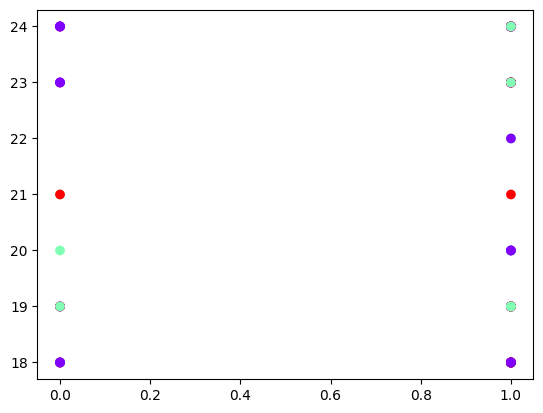

In [20]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assume the data is stored in a CSV file named 'data.csv'
data = filtered_data

# Display the first few rows of the dataset to verify it's loaded correctly
print(data.head())

# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=0)  # Assuming 3 clusters for simplicity
data['Cluster'] = kmeans.fit_predict(data)

# Displaying the count of individuals in each cluster
print(data['Cluster'].value_counts())

# You might want to visualize the clustering result to understand the distribution of data
# This is a simplistic visualization and may not work well for high-dimensional data
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=data['Cluster'], cmap='rainbow')
plt.show()

# From here, you could analyze the clusters to see if they reveal meaningful patterns
# in how different individuals respond to societal issues
# Further analysis could involve examining the centroid values of each cluster,
# or employing other machine learning and statistical analysis techniques to
# derive insights from the data.


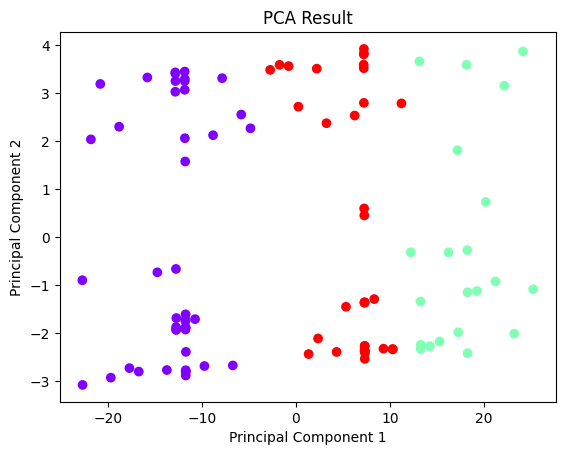

In [21]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Applying PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)

# Plotting the PCA results
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=data['Cluster'], cmap='rainbow')
plt.title('PCA Result')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Save the scatter plot as a PNG image
plt.savefig('scatter_plot.png', format='png')

# Display the plot (optional)
plt.show()


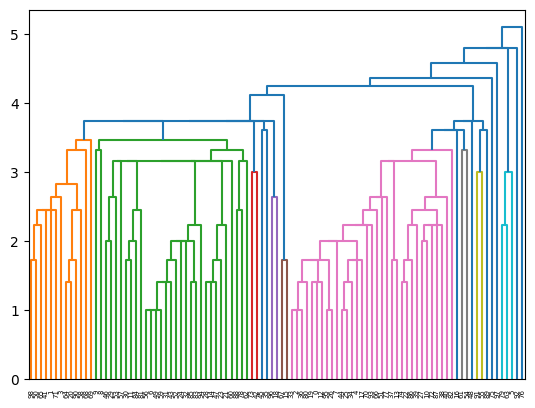

In [22]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Generating linkage matrix
linked = linkage(data, 'single')

# Plotting dendrogram
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
# Save the dendrogram as a PNG image
plt.savefig('dendrogram.png', format='png')

plt.show()



In [23]:
cluster_means = data.groupby('Cluster').mean()
print(cluster_means)


         Choose your gender        Age  What is your course?  \
Cluster                                                        
0                  0.750000  20.659091              9.704545   
1                  0.761905  19.952381             40.571429   
2                  0.764706  20.647059             28.617647   

         Your current year of Study  What is your CGPA?  Marital status  \
Cluster                                                                   
0                          0.840909            2.431818        0.204545   
1                          1.285714            1.857143        0.238095   
2                          0.911765            3.029412        0.058824   

         Do you have Depression?  Do you have Anxiety?  \
Cluster                                                  
0                       0.454545              0.409091   
1                       0.285714              0.238095   
2                       0.264706              0.323529   

         Do 

In [24]:
correlation_matrix = data.corr()
print(correlation_matrix)


                                              Choose your gender       Age  \
Choose your gender                                  1.000000e+00  0.020130   
Age                                                 2.012957e-02  1.000000   
What is your course?                               -3.820121e-02 -0.095258   
Your current year of Study                          9.757280e-02  0.229827   
What is your CGPA?                                  1.302641e-01  0.059772   
Marital status                                      5.627091e-02  0.109588   
Do you have Depression?                             1.225109e-01 -0.065304   
Do you have Anxiety?                               -8.724024e-02 -0.087113   
Do you have Panic attack?                          -2.498002e-17  0.063264   
Did you seek any specialist for a treatment?        4.490133e-02  0.050615   
Cluster                                             1.538878e-02 -0.008990   

                                              What is your cour

In [25]:
from scipy.stats import chi2_contingency

# Example: Testing independence between responses to the first and second questions
contingency_table = pd.crosstab(data.iloc[:, 0], data.iloc[:, 1])
chi2_stat, p_val, dof, ex = chi2_contingency(contingency_table)
print(f'Chi2 Stat: {chi2_stat}, P Value: {p_val}')


Chi2 Stat: 3.8618711180124223, P Value: 0.6953625687046162


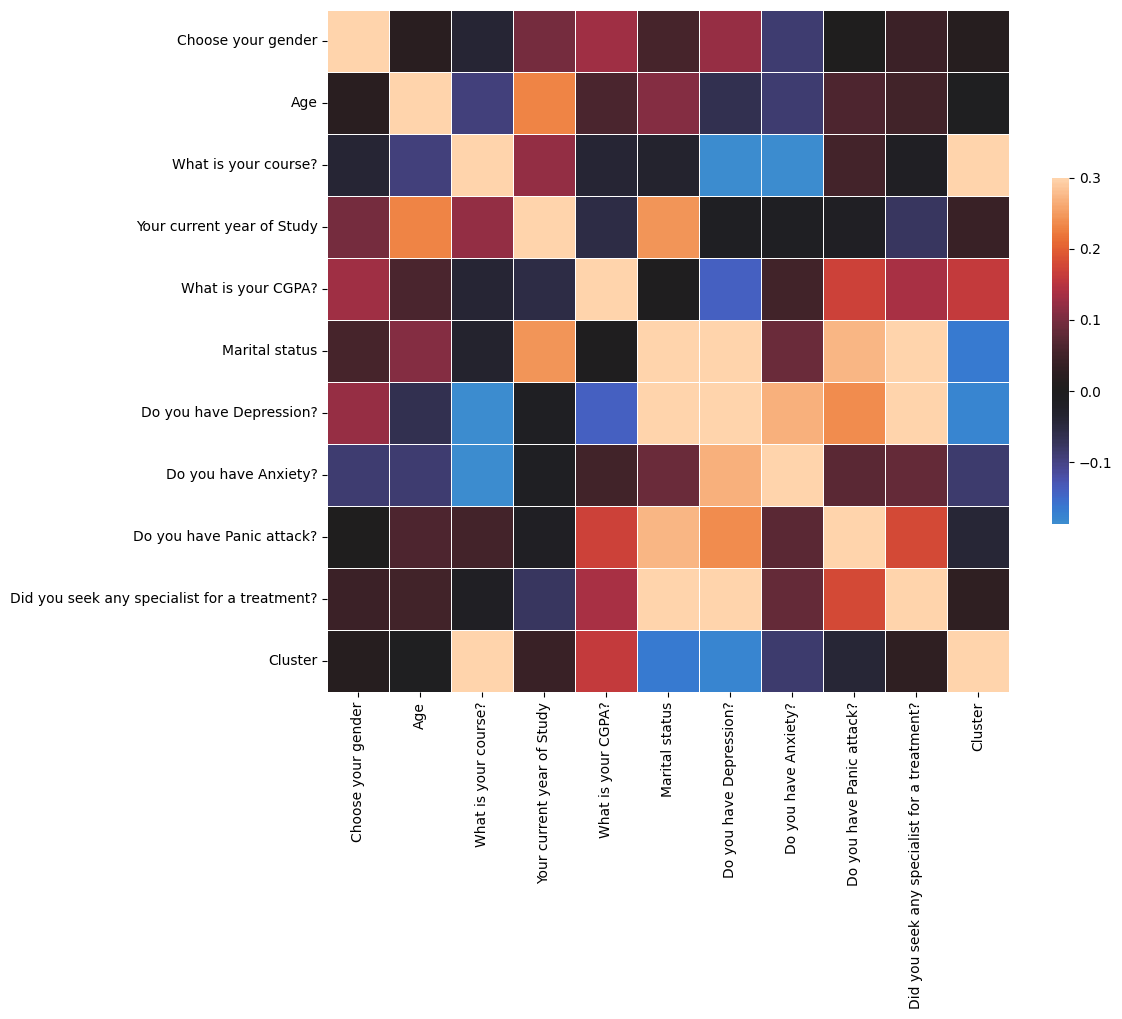

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming corr_matrix is your correlation matrix
corr_matrix = correlation_matrix

# Convert your data into a pandas DataFrame
import pandas as pd
corr_df = pd.DataFrame(corr_matrix)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_df, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Save the heatmap as a PNG image
plt.savefig('heatmap.png', format='png')

plt.show()
